# Plot time series csv data

## For the first we need to have a sample timeseries csv file

In [1]:
import random
import datetime

# Generate random time series data
data = [random.random() for _ in range(100)]

# Create a list of dates
dates = [datetime.datetime.now() + datetime.timedelta(days=i) for i in range(100)]

# Write the data to a CSV file
with open('timeseries.csv', 'w') as f:
    f.write('Date,Value\n')
    for date, value in zip(dates, data):
        f.write(f'{date},{value}\n')


In [ ]:
## Plot the time series data

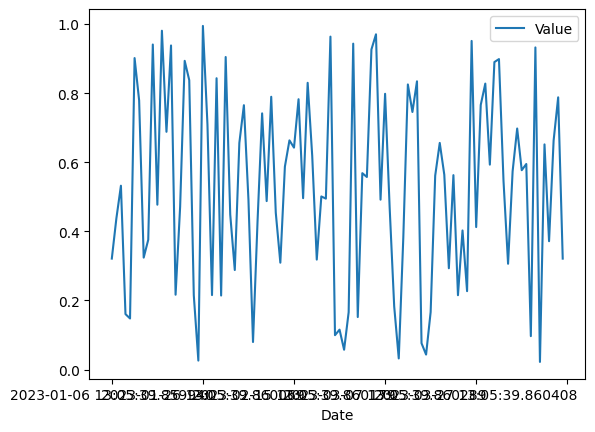

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("timeseries.csv")

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Plot the time series
df.plot()
plt.show()

If some library is not installed you can use this command:
!pip install pandas

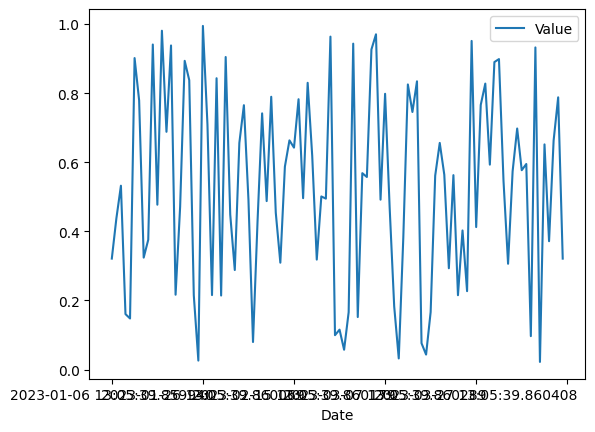

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("timeseries.csv")

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Plot the time series
df.plot()
plt.show()

The plot function takes a boolean argument show_legend, which determines whether the legend is displayed or not. The interact function creates an interactive widget that allows you to toggle the legend on and off.

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Read the CSV file into a DataFrame
df = pd.read_csv("timeseries.csv")

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Plot the time series
def plot(show_legend):
    ax = df.plot()
    if show_legend:
        ax.legend(loc='upper left')
    else:
        ax.legend().set_visible(False)

# Create the interactive widget
interact(plot, show_legend=True)


interactive(children=(Checkbox(value=True, description='show_legend'), Output()), _dom_classes=('widget-intera…

<function __main__.plot(show_legend)>

Now let us add some zoom feature. The plot function takes four arguments: xmin, xmax, ymin, and ymax, which represent the limits for the x-axis and y-axis.

In [5]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Read the CSV file into a DataFrame
df = pd.read_csv("timeseries.csv")

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Plot the time series
def plot(xmin, xmax, ymin, ymax):
    ax = df.plot()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Create the interactive widgets
interact(plot, xmin=df.index.min(), xmax=df.index.max(), ymin=df['Value'].min(), ymax=df['Value'].max())


interactive(children=(Text(value='2023-01-06 13:05:39.859940', description='xmin'), Text(value='2023-04-15 13:…

<function __main__.plot(xmin, xmax, ymin, ymax)>

This will create a CSV file with 100 rows and 10 columns, with the first column containing a timestamp and the remaining columns containing random values between 0 and 1. 

In [6]:
import random
import csv

# set the number of rows and columns
num_rows = 100
num_cols = 10

# create a list of column names
column_names = ['timestamp'] + [f'col{i}' for i in range(1, num_cols+1)]

# create an empty list to store the rows of data
data = []

# add a row for the column names
data.append(column_names)

# create a list of random values for each row
for i in range(num_rows):
  row = [i] + [random.random() for _ in range(num_cols)]
  data.append(row)

# write the data to a CSV file
with open('time_series_data.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(data)


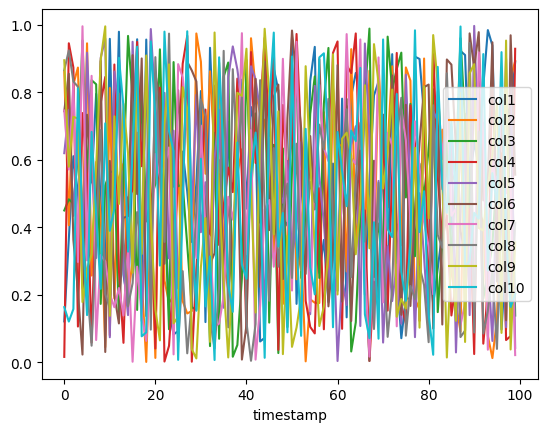

In [7]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# read the data into a pandas dataframe
df = pd.read_csv('time_series_data.csv')

# set the index to the 'timestamp' column
df.set_index('timestamp', inplace=True)

# plot the data using the `plot` method of the dataframe
df.plot()

# show the plot
plt.show()


In below code possible to bring matplotlib widget. This will bring the control to zoomin and out, resize etc.

<IPython.core.display.Javascript object>


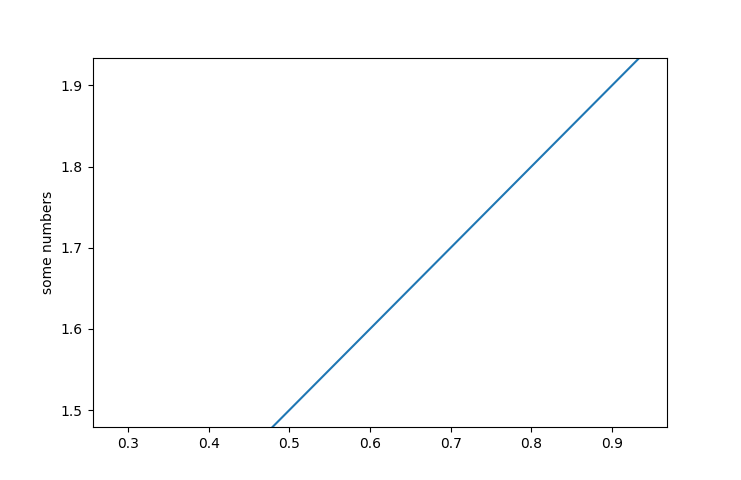

In [9]:
%matplotlib nbagg

import matplotlib.pyplot as plt

# create the plot
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')

# show the plot in full screen
plt.show()



### python script will take input from csv file and automatically detect number of columns in the csv file. Then provide a drop down option to plot single or muliple columns

#### First generate a random dataset

In [23]:
import pandas as pd
import numpy as np

# Create a dataframe with 10 columns of random data
df = pd.DataFrame(np.random.rand(100, 10), columns=['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6', 'Column 7', 'Column 8', 'Column 9', 'Column 10'])

# Save the dataframe to a CSV file
df.to_csv("random_data.csv", index=False)


In [27]:
import pandas as pd
from ipywidgets import widgets, interact

# Read the CSV file into a dataframe
df = pd.read_csv("random_data.csv")

# Add a new column to the dataframe
df.insert(0, "Index", range(1, len(df) + 1))

# Save the modified dataframe to a new CSV file
df.to_csv("index_data.csv", index=False)


#### Now will create GUI for plot selection

In [28]:

# Create a dropdown menu for the x-axis column
x_column_widget = widgets.Dropdown(
    options=list(df.columns),
    value=df.columns[0],
    description='X-axis column:',
    disabled=False
)

# Create a multiselect widget for the y-axis columns
y_column_widget = widgets.SelectMultiple(
    options=list(df.columns),
    value=[df.columns[1]],
    description='Y-axis columns:',
    disabled=False
)


In [50]:
# Read the modified CSV file into a dataframe
df = pd.read_csv("index_data.csv")

# df.plot('Index', 'Column 1')

#df.plot(x='Index', y=['Column 1', 'Column 3'], linestyle_=['solid', 'dashed'], legend=True, legend_out=True, color=['red', 'green'])



In [36]:
# Function to plot selected data

def plot_columns(df, x_column, y_columns):
    # Check if the x-axis column exists in the dataframe
    if x_column not in df.columns:
        print(f"Error: x-axis column '{x_column}' not found in dataframe")
        return
    
    # Check if the y-axis columns exist in the dataframe
    for y_column in y_columns:
        if y_column not in df.columns:
            print(f"Error: y-axis column '{y_column}' not found in dataframe")
            return
    
    # Convert the y_columns variable to a list
    y_columns = list(y_columns)
    
    # Plot the selected columns
    df.plot(x=x_column, y=y_columns)


In [37]:
# Function to act after clicking plot button
def on_plot_button_clicked(b):
    x_column = x_column_widget.value
    y_columns = y_column_widget.value
    plot_columns(df, x_column, y_columns)

Dropdown(description='X-axis column:', options=('Index', 'Column 1', 'Column 2', 'Column 3', 'Column 4', 'Colu…

SelectMultiple(description='Y-axis columns:', index=(1, 2, 3), options=('Index', 'Column 1', 'Column 2', 'Colu…

Button(description='Plot', style=ButtonStyle())

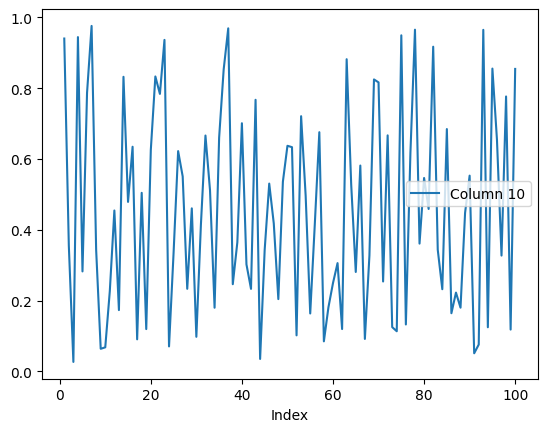

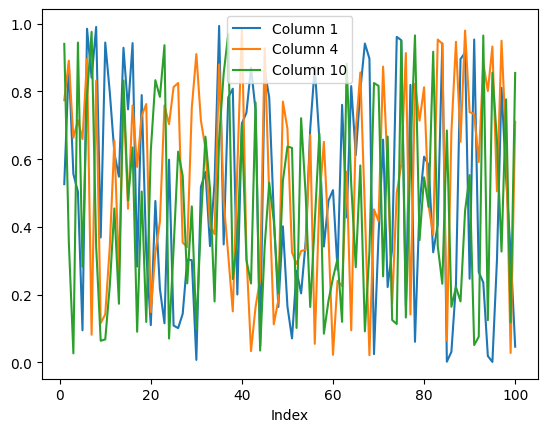

In [38]:
# Create a button widget
plot_button = widgets.Button(description="Plot")

plot_button.on_click(on_plot_button_clicked)

display(x_column_widget, y_column_widget, plot_button)


Below script can be used to plot using matplotlib

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df[x_column], df['Column 1'], linestyle='--', color='red', label='Column 1')
plt.plot(df[x_column], df['Column 3'], linestyle='-', color='green', label='Column 3')
plt.legend(loc='upper right')